In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
wine_data = load_wine()
df_data=pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_target=pd.DataFrame(wine_data.target, columns=["kind"])
totall_data=pd.concat([df_data,df_target], axis=1)

In [3]:
totall_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

In [4]:
df_data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
df_data.dropna() #결측값 있는 행 제거
df_data.dropna(axis=1) #결측값 있는 열 제거

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [47]:
#EDA 부분


In [6]:
#sns.set_theme(style="whitegrid")
#sns.boxplot(x="color_intensity",data=totall_data, palette="Set3")
#plt.title("Color Intensity")
#plt.show()

In [7]:
#Q1 = totall_data[['color_intensity']].quantile(q=0.25)
#Q3 = totall_data[['color_intensity']].quantile(q=0.75)
#print(Q1)
#print(Q3)

In [8]:
#IQR = Q3-Q1
#IQR

In [9]:
#sns.countplot(data=totall_data, x="kind")

In [10]:
#totall_data

In [11]:
#plt.scatter(totall_data['kind'], totall_data['hue'])
#plt.xlabel('Kind')
#plt.ylabel('Hue')

#plt.show()

In [12]:
#plt.scatter(totall_data['kind'], totall_data['color_intensity'])
#plt.xlabel('Kind')
#plt.ylabel('Color Intensity')

#plt.show()

In [13]:
#sns.pairplot(totall_data,
#            vars=['color_intensity', 'hue'],
#            hue ='kind')
#plt.show()

In [14]:
#sns.set_theme(style="whitegrid")
#sns.boxplot(x="kind", y="color_intensity", data=totall_data)
#plt.title("Color Intensity")
#plt.show()

In [15]:
#sns.boxplot(x="kind", y="alcohol", data=totall_data)
#plt.title("Alcohol")

In [16]:
#sns.countplot(data=totall_data, x="ash")
#plt.xlabel("Ash")
#plt.ylabel("Count")
#plt.title("Label")

In [17]:
X=totall_data.drop('kind',axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
y=totall_data['kind']
y.value_counts()

1    71
0    59
2    48
Name: kind, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [20]:
X_train.to_numpy()

array([[1.364e+01, 3.100e+00, 2.560e+00, ..., 9.600e-01, 3.360e+00,
        8.450e+02],
       [1.260e+01, 2.460e+00, 2.200e+00, ..., 7.300e-01, 1.580e+00,
        6.950e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

In [21]:
y_train.to_numpy()

array([0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       2])

In [22]:
#SGDClassifier 사용


In [23]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='hinge', max_iter=100, random_state=40)
sc.fit(X_train, y_train)
train_score = []
test_score = []

classes = np.unique(y_train)
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.6917293233082706
0.8222222222222222


In [24]:
for _ in range(0, 300):
    sc.partial_fit(X_train, y_train, classes=classes)
    
    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test, y_test))

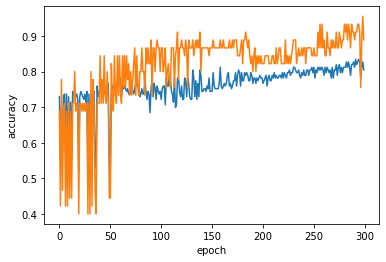

In [25]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [26]:
#검증 세트


In [27]:
sub_input, val_input, sub_target, val_target = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(106, 13) (27, 13)


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.8888888888888888


In [29]:
#교차 검증


In [30]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)
print(scores)

{'fit_time': array([0., 0., 0., 0., 0.]), 'score_time': array([0.00234938, 0.        , 0.        , 0.        , 0.00773168]), 'test_score': array([0.77777778, 0.96296296, 0.92592593, 0.92307692, 0.80769231])}


In [31]:
import numpy as np

print(np.mean(scores['test_score']))

0.8794871794871794


In [32]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, X_train, y_train, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8794871794871794


In [33]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))

0.9318681318681319


In [34]:
#GridSearchCV 사용


In [35]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [36]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [37]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [38]:
dt = gs.best_estimator_
print(dt.score(X_train, y_train))

1.0


In [39]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [40]:
print(gs.cv_results_['mean_test_score'])

[0.87948718 0.87948718 0.87948718 0.87948718 0.87948718]


In [41]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [42]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [43]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [44]:
print(gs.best_params_)

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 12}


In [45]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8868945868945868


In [ ]:
"""
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
"""

In [ ]:
"""
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))
"""

In [ ]:
"""
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))
"""

In [ ]:
"""
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))
"""

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))
"""

In [ ]:
"""
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train.values.ravel())
a=model.score(X_test, y_test)
"""

In [ ]:
"""
for n in range(3, 133):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    if score > a:
        print(n)
        a = score
        max = n
model.n_neighbors = max
model.fit(X_train, y_train.values.ravel())
max_S = model.score(X_test, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(max_S*100, max))
"""